In [3]:
import numpy as np


In [10]:
landmark_dict = {}

with open('list_landmarks.txt', 'r') as file:
    for line in file:
        parts = line.strip().split()

        # Skip the header row
        if parts[0] == "image_name":
            continue

        image_name = parts[0]
        data = parts[3:]  # Skip: image_name, clothes_type, variation_type

        # Extract x, y from (visibility, x, y) triplets
        landmarks = []
        for i in range(0, len(data), 3):
            if i + 2 < len(data):  # Make sure the triplet is complete
                x = int(data[i + 1])
                y = int(data[i + 2])
                landmarks.append((x, y))

        # Store in dictionary
        landmark_dict[image_name] = landmarks

# 🔍 Example: print the landmarks for the first image
for img, points in list(landmark_dict.items())[:2]:
    print(img, "=>", points)

img/img_00000001.jpg => [(144, 156), (221, 159), (86, 218), (250, 238), (111, 408), (237, 412)]
img/img_00000002.jpg => [(111, 104), (153, 105), (74, 146), (181, 163), (84, 188), (137, 198)]


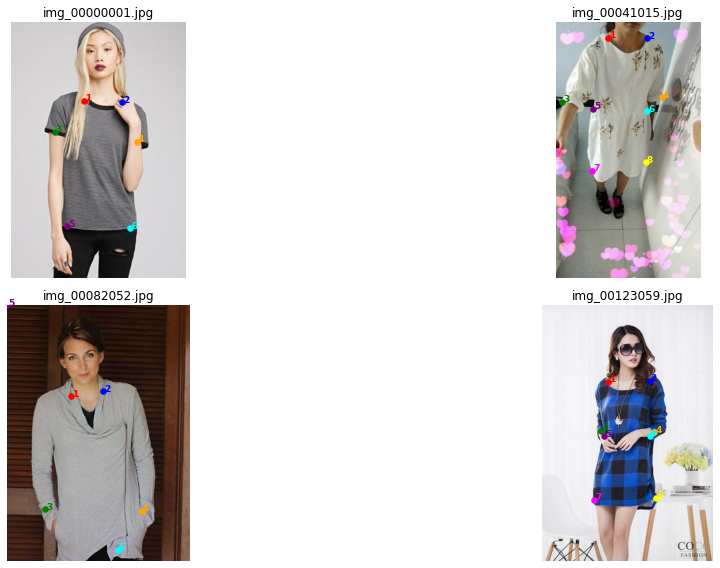

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

# Define 8 distinct colors for up to 8 landmarks
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

# Number of images to plot
N = 4

# Get 10 evenly spaced images
all_images = list(landmark_dict.keys())
sampled_images = [all_images[i] for i in np.linspace(0, len(all_images)-1, N, dtype=int)]

# Plot in a 2x5 grid
fig, axes = plt.subplots(int(np.ceil(N/2)), 2, figsize=(20, 8))

for ax, img_path in zip(axes.flatten(), sampled_images):
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        continue

    # Load image
    image = Image.open(img_path)
    ax.imshow(image)

    # Plot landmarks with color-coded labels
    landmarks = landmark_dict[img_path]
    for idx, (x, y) in enumerate(landmarks):
        color = colors[idx % len(colors)]  # handle fewer than 8 landmarks safely
        ax.scatter(x, y, color=color, s=30)
        ax.text(x+2, y, str(idx+1), fontsize=9, color=color, weight='bold')  # label each point

    ax.set_title(os.path.basename(img_path))
    ax.axis('off')

plt.tight_layout()
plt.show()


In [9]:
sampled_images

['123016',
 'img/img_00041014.jpg',
 'img/img_00082051.jpg',
 'img/img_00123059.jpg']